## GDP AND LIFE EXPECTANCY ANALYSIS 

## Introduction

This project will investigate how life expectancy and GDP per capita have changed in selected six countries from year 2000 to 2015 and whether these two values are correlated.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

**Data sources**

* GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

* Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Table of contents 

* Asking Questions
* Data Wrangling
* Exploratory Data Analysis
* Conclusions

## Asking Questions

Based on dataset, the questions that are aimed to answer:

* Q1: What was the average GDP per capita in selected countries?
* Q2: Which countries had the highest and lowest average GDP per capita?
* Q3: What was the average citizen's life expectancy in selected countries?
* Q4: Which countries had the longest and shortest average citizen life expectancy?
* Q5: How has GDP per capita and average life expectancy at birth changed from year 2000 to 2015 in selected countries? 
* Q6: Is there a correlation between GDP per capita and citizen's life expectancy?
* Q7: Do citizens of countries with higher average GDP per capita have longer life expectancy?

## Data Wrangling

First, relevant libraries are imported and data from csv file is converted to dataframe.

### Preparing The Environment And Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv("all_data.csv")

### Accessing Data

The contents of dataframe are investigated by printing the first five rows.

In [3]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Checking what countries are included in dataset and if the data is equally divided between them.

In [4]:
data.Country.value_counts().reset_index()

,index,Country
0,Chile,16
1,China,16
2,Germany,16
3,Mexico,16
4,United States of America,16
5,Zimbabwe,16


There is the same amount of rows for each country in dataset.

"United States of America" will be replaced by a shorter name "USA".

In [5]:
data = data.replace({"Country": {"United States of America": "USA"}}) 

In [6]:
data.Country.value_counts().reset_index()

,index,Country
0,Chile,16
1,China,16
2,Germany,16
3,Mexico,16
4,USA,16
5,Zimbabwe,16


Checking whether the variables are assigned with relevant data types and if there is any data missing.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


No data is missing, data types are accurate. The only thing that could be changed is to convert "Country" column to string data type, if needed to run string operations on it. At the moment it does not seem necessary, so data types are left as they are. 

Next, checking summary statistics of dataframe contents to gain some insight about dataset.

In [8]:
data.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


To make data easier to understand, GDP column values are reduced by 9 digits and the values will be expressed in Billions USD:

In [9]:
data["GDP"] = data["GDP"] / 1000000000

In [10]:
data.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,96.000000
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3880.498571
std,NaN,4.633971,10.672882,5197.561311
min,NaN,2000.000000,44.300000,4.415703
25%,NaN,2003.750000,74.475000,173.301750
50%,NaN,2007.500000,76.750000,1280.220000
75%,NaN,2011.250000,78.900000,4067.510000


### Handling Duplicates

In [11]:
data.duplicated().sum()

0

No duplicated rows found.

### Exploratory Data Analysis

After the data is prepared, moving on to exploratory analysis to answer the questions.

### Q1: What was the average GDP per capita in selected countries?

To accurately assess the average GDP size, it is best to first examine the central location and spread of the values. For this purpose, histogram plot can be used.

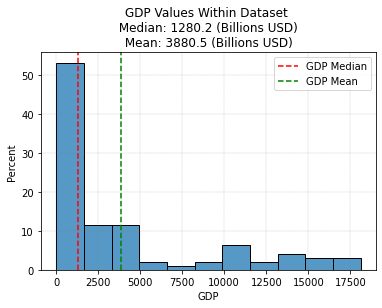

<Figure size 432x288 with 0 Axes>

In [12]:
median_GDP = round(data["GDP"].median(), 1)
mean_GDP = round(data["GDP"].mean(), 1)

sns.histplot(data["GDP"], stat='percent')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.title(f"GDP Values Within Dataset \n Median: {median_GDP} (Billions USD) \n Mean: {mean_GDP} (Billions USD) ")
plt.axvline(median_GDP, color = 'red', linestyle = '--', label="GDP Median")
plt.axvline(mean_GDP, color = 'green', linestyle = '--', label="GDP Mean")
plt.legend()
plt.show()
plt.clf()

The plot is skewed to the right-hand side with one well-defined mode on the left-hand side of the plot, which leads to mean being greater than more than 60% of values in the dataset. In this case, perhaps a median is a better representation of the majority of values.

### Q2: Which countries had the highest and lowest average GDP per capita between year 2000 to 2015?

In the previous plot the data was not broken up by countries, so it is not very clear what causes such distribution of values. To further investigate that and to answer the second question, a bar plot will be used to compare GDP size means within each country.

In [13]:
data_means = data.drop("Year", axis=1).groupby("Country").mean().reset_index()
data_means

,Country,Life expectancy at birth (years),GDP
0,Chile,78.94375,169.788845
1,China,74.26250,4957.713750
2,Germany,79.65625,3094.775625
3,Mexico,75.71875,976.650625
4,USA,78.06250,14075.000000
5,Zimbabwe,50.09375,9.062580


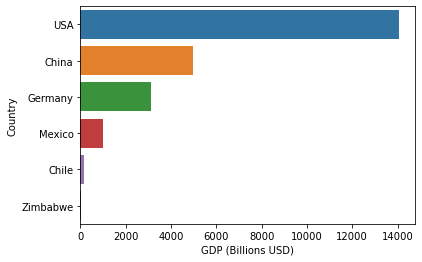

<Figure size 432x288 with 0 Axes>

In [14]:
sns.barplot(x="GDP", y="Country", data=data_means, order=data_means.sort_values('GDP', ascending=False).Country)
plt.xlabel("GDP (Billions USD)")
plt.show()
plt.clf()

There is a notable variation in GDP sizes throughout the countries, for example, Zimbabwe's GDP per capita in comparison was so low, that it is not even visible in this plot. On the other hand, United States of America had significantly larger average GDP than the rest of the countries, which could explain the previously observed skew in distribution of GDP values.

### Q3: What was the average citizen's life expectancy in selected countries?

To answer this question once more, a histogram plot will be used to visualize the value's central location and spread within the dataset.



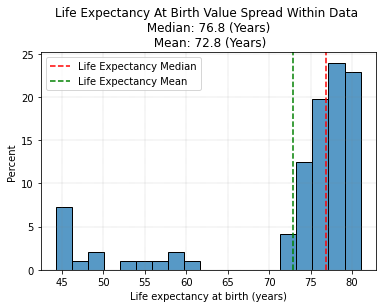

<Figure size 432x288 with 0 Axes>

In [15]:
median_Life_Expectancy = round(data["Life expectancy at birth (years)"].median(), 1)
mean_Life_Expectancy = round(data["Life expectancy at birth (years)"].mean(), 1)

sns.histplot(data["Life expectancy at birth (years)"], stat='percent')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.title(f"Life Expectancy At Birth Value Spread Within Data \n Median: {median_Life_Expectancy} (Years) \n Mean: {mean_Life_Expectancy} (Years)")
plt.axvline(median_Life_Expectancy, color = 'red', linestyle = '--', label="Life Expectancy Median")
plt.axvline(mean_Life_Expectancy, color = 'green', linestyle = '--', label="Life Expectancy Mean")
plt.legend()
plt.show()
plt.clf()

Almost opposite to GDP per capita value distribution plot, life expectancy at birth value plot is skewed to the left-hand side, with the majority of values being on the right-hand side of the plot. Far outliers on the left-hand side of the plot lead to mean being slightly smaller than the 50th percentile of the values.  

### Q4: Which countries had the longest and shortest average citizen life expectancy? 

A bar plot will be used to break up the data by countries. This will also help to explain the skewness of the plot above. 

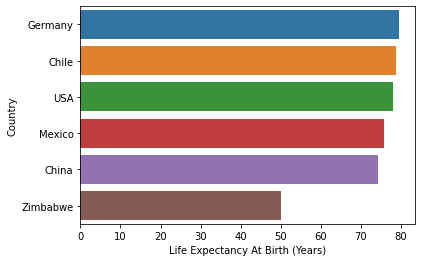

<Figure size 432x288 with 0 Axes>

In [16]:
sns.barplot(x="Life expectancy at birth (years)", y="Country", data=data_means, order=data_means.sort_values("Life expectancy at birth (years)", ascending=False).Country)
plt.xlabel("Life Expectancy At Birth (Years)")
plt.show()
plt.clf()

Germany had the longest average life expectancy of its citizens, but there is not as much variation in average life expectancy within each country, as was observed with GDP per capita. The majority of countries had similar citizen life expectancy, the only exception is Zimbabwe, which had notably shorter life expectancy of its citizens. This explains the far outliers observed in previous plot.

### Q5: How has GDP per capita and average life expectancy at birth changed from year 2000 to 2015 in selected countries?

To answer this question, line plots will be used to track the changes throughout the years.

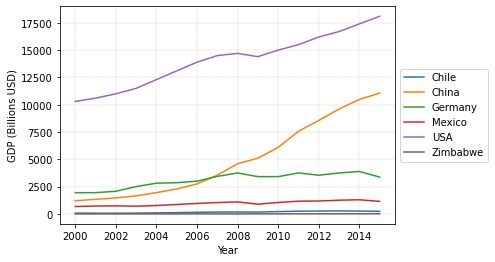

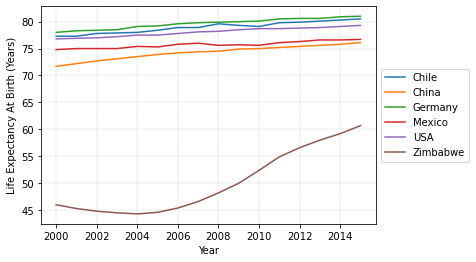

<Figure size 432x288 with 0 Axes>

In [17]:
sns.lineplot(x=data.Year, y=data.GDP, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP (Billions USD)")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.show()
plt.clf()

sns.lineplot(x=data.Year, y=data["Life expectancy at birth (years)"], hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life Expectancy At Birth (Years)")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.show()
plt.clf()

Both GDP per capita and life expectancy have increased throughout the years in all countries.

As visualized in the first plot, United States from America had a significantly larger GDP per capita throughout the time, while China had the most rapid increase in GDP per capita: in year 2000 it had the third-largest GDP per capita, but after year 2006 it outgrew Germany's GDP per capita and became the second largest. By 2015 China's GDP per capita was more than twice as large as Germany's.

Citizen's life expectancy has steadily increased in 5 out of 6 countries. While Zimbabwe had the most significant increase in the length of citizen's life expectancy, it remained significantly shorter than in the rest of the countries.

### Q6: Is there a correlation between GDP per capita and citizen's life expectancy?

To check if there is any correlation between average life expectancy and GDP, change throughout time of both of these values are investigated in each country individually. To better understand how these values correlate, scatterplots are used to demonstrate the correlation. In addition, overlapping GDP and life expectancy line graphs are used to represent the relationship between these values over time.

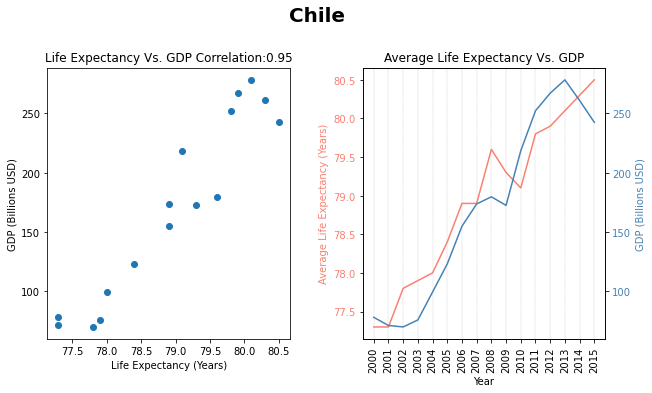

<Figure size 432x288 with 0 Axes>

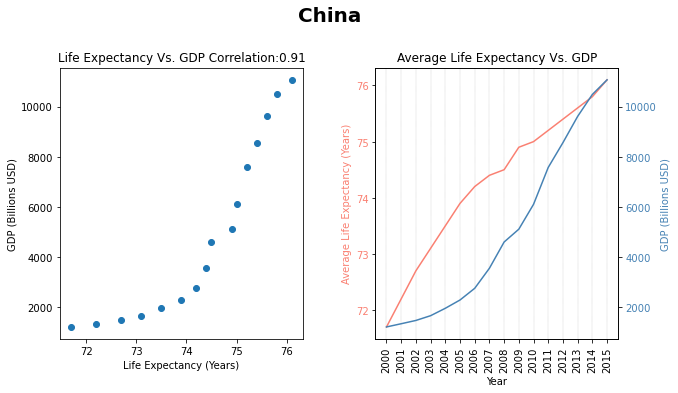

<Figure size 432x288 with 0 Axes>

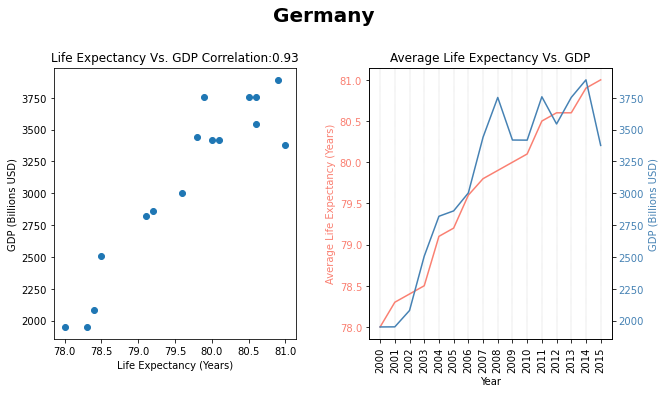

<Figure size 432x288 with 0 Axes>

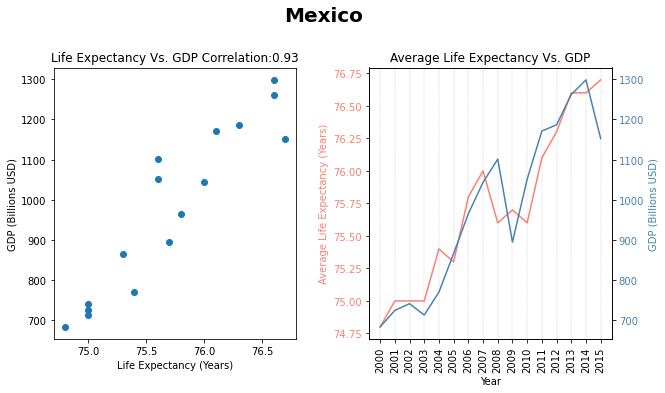

<Figure size 432x288 with 0 Axes>

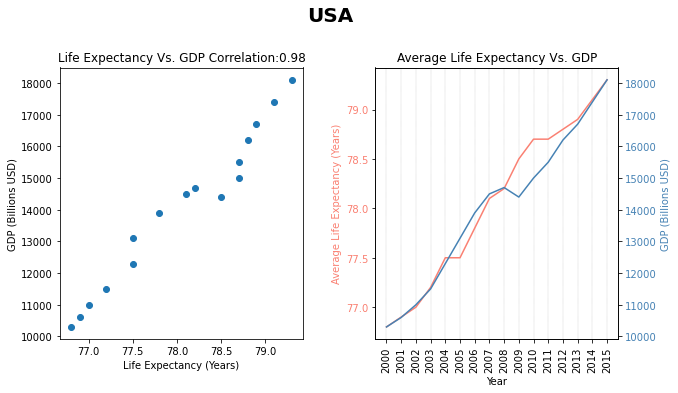

<Figure size 432x288 with 0 Axes>

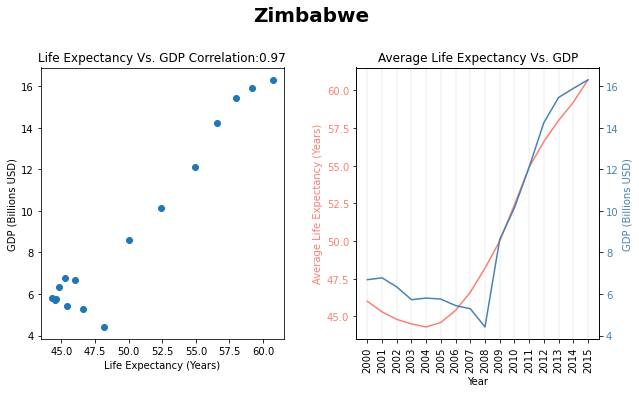

<Figure size 432x288 with 0 Axes>

In [18]:
for country in data.Country.unique():
    mod_data = data[data.Country == country]
    
    fig = plt.figure(figsize=(10,5))
    gs = fig.add_gridspec(1,2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])

    fig.suptitle(country,fontweight='bold',fontsize=20, y=1.05)

    x_years = range(len(mod_data["Year"].unique().tolist()))
    y_life = mod_data["Life expectancy at birth (years)"]
    y_GDP = mod_data["GDP"]
    years_list = mod_data["Year"].unique().tolist()
    
    x = mod_data["Life expectancy at birth (years)"]
    y = mod_data["GDP"]

    correlation, p = pearsonr(x,y)

    ax1.scatter(x, y)
    ax1.set_title(f"Life Expectancy Vs. GDP Correlation:{round(correlation,2)}")
    ax1.set_ylabel("GDP (Billions USD)")
    ax1.set_xlabel("Life Expectancy (Years)")
  
    ax2.plot(x_years, y_life, color = 'salmon') 
    ax2.set_title("Average Life Expectancy Vs. GDP")
    ax2.tick_params(axis ='y', labelcolor = 'salmon')
    ax2.set_xticks(x_years)
    ax2.set_xticklabels(years_list, rotation=90)
    ax2.set_ylabel("Average Life Expectancy (Years)", color='salmon')
    ax2.set_xlabel("Year")
    ax2.grid(axis='x',color = 'gray', linestyle = '--', linewidth = 0.2)
    
    # Adding Twin Axes

    ax0 = ax2.twinx() 

    ax0.plot(x_years, y_GDP, color = 'steelblue') 
    ax0.tick_params(axis ='y', labelcolor = 'steelblue') 
    ax0.set_ylabel("GDP (Billions USD)", color='steelblue')
    
    plt.subplots_adjust(wspace=0.3)

    plt.show()
    plt.clf()

A positive correlation between GDP per capita and average life expectancy is visible in the scatterplots, but to measure the strength of correlation, Pearson's Correlation method was applied, and the results demonstrated a strong positive correlation in each country (results ranged from 0.91 to 0.98 in a scale from -1 to 1, 0 meaning no correlation, -1 - negative correlation and 1 - positive correlation).

Similar pattern can be observed in overlapping line plots as well, in the majority of plots GDP and life expectancy lines overlapped in several places and had similarities in its patterns. The least similarities are observed in China, which had the lowest correlation score as well. It seems that in China average life expectancy was increasing more rapidly in the beginning, but over time the tendency has subsided a little bit, while GDP increased more rapidly each year.

### Q7: Do citizens of countries with higher average GDP per capita have longer life expectancy?

The previous study demonstrated a strong correlation between GDP per capita size and average life expectancy of citizens. While GDP per capita is a popular measure of the standard of living, prosperity, and overall well-being in a country, can a conclusion be drawn that citizens of countries with higher average GDP per capita have longer life expectancy? To answer this question, side-by-side bar plots portraying average GDP per capita size and average life expectancy are used to demonstrate whether such conclusion can be true. The plot is arranged by average life expectancy in descending order.

In [19]:
data_means_sorted = data_means.sort_values(by="Life expectancy at birth (years)",ascending=False).reset_index()
data_means_sorted

,index,Country,Life expectancy at birth (years),GDP
0,2,Germany,79.65625,3094.775625
1,0,Chile,78.94375,169.788845
2,4,USA,78.06250,14075.000000
3,3,Mexico,75.71875,976.650625
4,1,China,74.26250,4957.713750
5,5,Zimbabwe,50.09375,9.062580


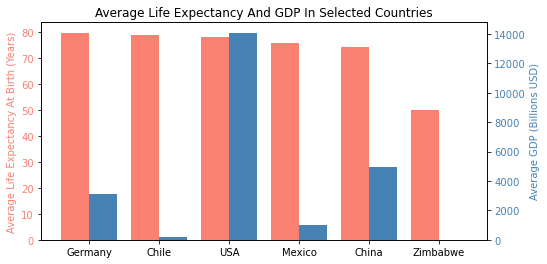

<Figure size 432x288 with 0 Axes>

In [20]:
a = data_means_sorted["Life expectancy at birth (years)"].tolist()
x_labels = data_means_sorted["Country"].tolist()
b = data_means_sorted["GDP"].tolist()

x1_values = [i*2 - 0.4 for i in range(len(x_labels))]
x2_values = [i*2 + 0.4 for i in range(len(x_labels))]

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot()

ax1.bar(x1_values, a, color='salmon')
ax1.set_title("Average Life Expectancy And GDP In Selected Countries")
ax1.set_ylabel("Average Life Expectancy At Birth (Years)", color='salmon')
ax1.set_xticks([i*2 for i in range(len(x_labels))])
ax1.set_xticklabels(x_labels)
ax1.tick_params(axis ='y', labelcolor = 'salmon')

ax0 = ax1.twinx()

ax0.bar(x2_values, b, color='steelblue')
ax0.set_ylabel("Average GDP (Billions USD)", color='steelblue')
ax0.tick_params(axis ='y', labelcolor = 'steelblue')

plt.show()
plt.clf()

As observed before, in 5 out of 6 countries average life expectancy had little variation, while GDP varied greatly in each country, with Zimbabwe being the exception.

In this plot, it is evident that country with higher average GDP did not necessarily have a longer average life expectancy compared to other countries. For example, Chile had the second-lowest average GDP throughout the years, but it's average life expectancy at birth was second longest of the six countries. 

## Conclusions

A quick summary of the answers to the questions:

**Q1: What was the average GDP per capita in selected countries?**

_The majority of values in the dataset were around 1280 Billions USD, but because there is great variation in GDP size, the average is 3880 Billions USD._

**Q2: Which countries had the highest and lowest average GDP per capita between year 2000 to 2015?**

_United States of America had the highest GDP per capita and Zimbabwe had the lowest GDP per capita._

**Q3: What was the average citizen's life expectancy in selected countries?**

_The majority of life expectancy values were around 76.8 years, but lower life expectancy in Zimbabwe resulted in overall average life expectancy being 72.8 years._

**Q4: Which countries had the longest and shortest average citizen life expectancy?**

_Germany had the longest and Zimbabwe - the shortest life expectancy._

**Q5: How has GDP per capita and average life expectancy at birth changed from year 2000 to 2015 in selected countries?**

_In all countries, both values have increased. China had the most rapid GDP per capita increase and Zimbabwe - the most significant life expectancy increase._

**Q6: Is there a correlation between GDP per capita and citizen's life expectancy?**

_In all countries, a strong positive correlation was observed_

**Q7: Do citizens of countries with higher average GDP per capita have longer life expectancy?**

_This study has not found such pattern to be true._

In conclusion, throughout the years a positive increase has been observed in both GDP per capita and average life expectancy of citizens, but while there is a strong correlation between those two variables, other factors that are not included in this study also contribute to longer life expectancy. For example, if a country has a developed agriculture and a good portion of citizens can live on their own produce without purchasing goods, GDP value can remain low, even though living conditions in such country are good. Therefore, GDP alone is not a good reflector of citizen's life expectancy at birth and overall living conditions. Though low GDP can indicate some underlying issues that can lead to short life expectancy, there are many different factors to consider.

Limitations of Dataset

1. The dataset consists information of only 6 countries out of 195 and it is unclear if they were picked randomly. This dataset was used only for practice and learning, not to draw accurate conclusions about GDP per capita and life expectancy at birth in all countries.